In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime

# 우리나라 기후

In [10]:
# 파일 불러오기
df = pd.read_csv('./국내기후(백령도제외).csv', index_col=0)

# 시간 datetim형식으로 바꾸기
df['시간'] = pd.to_datetime(df['시간'], format='%Y-%m-%d')

# 1995년 이후 데이터만 가져오기
df_k = df[df['시간'].dt.year > 1995]
df_k = df_k[df_k['시간'] < '2021-09-01']
df_k = df_k.reset_index()
df_k.drop('index', axis=1, inplace=True)

# 서울 지역 기후만 가져오기
df_seoul = df_k[df_k['관측지점'] == '서울']

# 장마예측에 필요없는 기후데이터 drop
df_seoul.drop(['평균 기온','최저 기온','최고 기온','최고 해면 기압','최저 해면기압','합계 일조 시간'
               ,'1시간 최다 일사량','합계 일사','일 최심신적설','합계 3시간 신적설','평균 지면온도','평균 중하층운량'], axis=1, inplace=True)

# column 이름 바꾸기
df_seoul.rename(columns={'시간':'일시', '관측지점':'도시명'}, inplace=True)

# 다른 기후들과 merge했을때 헷갈리지 않도록 column이름마다 서울 붙여주기
col_li = df_seoul.columns

seo_li=['일시']
for i in col_li[1:]:
    na = '서울 '+i
    seo_li.append(na)
df_seoul.columns = seo_li

# 도시명 drop
df_seoul.drop('서울 도시명', axis=1, inplace=True)


df_seoul

,일시,서울 1시간 최다강수량,서울 일강수량,서울 최대 순간풍속,서울 최대 순간 풍속 풍향,서울 최대 풍속,서울 최대 풍속 풍향,서울 평균 풍속,서울 풍정합,서울 최대 풍향,서울 평균 이슬점온도,서울 평균 상대습도,서울 평균 증기압,서울 평균 현지기압,서울 평균 해면기압,서울 일 최심적설,서울 평균 전운량,서울 합계 대형증발량,서울 합계 소형증발량,서울 안개 계속 시간
0,1996-01-01,0.0,0.0,6.0,340.0,3.5,290.0,1.6,1397.0,290.0,-20.1,26.3,1.3,1012.6,1023.8,0.0,0.0,2.721902,1.6,0.0
1,1996-01-02,0.0,0.0,9.3,230.0,3.8,230.0,1.8,1594.0,70.0,-8.7,51.5,3.3,1007.6,1018.6,0.0,7.3,2.721902,2.1,0.0
2,1996-01-03,0.0,0.0,17.5,270.0,8.2,290.0,5.3,4538.0,290.0,-16.7,42.3,2.1,1010.9,1022.1,0.0,2.5,2.721902,1.7,0.0
3,1996-01-04,0.0,0.0,7.1,270.0,3.5,270.0,1.2,1032.0,50.0,-17.6,38.0,1.6,1015.0,1026.2,0.0,1.5,2.721902,1.9,0.0
4,1996-01-05,0.0,2.0,7.8,70.0,3.7,70.0,2.4,2088.0,70.0,-6.0,67.0,4.3,1010.3,1021.3,0.0,10.0,2.721902,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,2021-08-27,0.7,0.9,4.9,250.0,3.2,250.0,1.3,1111.0,290.0,19.4,83.5,22.6,1003.2,1013.1,0.0,9.1,0.900000,1.3,0.0
9371,2021-08-28,0.0,0.0,7.3,270.0,3.9,270.0,1.8,1568.0,270.0,19.8,80.4,23.1,1004.2,1014.0,0.0,8.4,2.900000,4.1,0.0
9372,2021-08-29,0.7,0.9,5.6,340.0,3.4,320.0,1.6,1379.0,270.0,20.4,82.6,24.0,1004.0,1013.8,0.0,8.6,1.900000,2.7,0.0
9373,2021-08-30,0.0,0.0,4.5,270.0,2.9,250.0,1.4,1242.0,270.0,19.8,77.5,23.1,1005.9,1015.7,0.0,8.3,2.400000,3.4,0.0


# 주변국 기후

In [11]:
# 주변국 기후데이터 가져오기
df_w = pd.read_csv('./preprocessed_주변국 기상데이터_199601to202108.csv', index_col=0)

# 일시 datetime으로 형식 바꿔주기
df_w['일시'] = pd.to_datetime(df_w['일시'], format='%Y-%m-%d')

# 장마예측에 필요없는 column drop
df_w.drop(['도시명','평균기온','최고기온','최저기온'], axis=1, inplace=True)

# 같은 날짜에 군집한 지역마다 기후 묶어주기
df_ww = df_w.groupby(['군집', '일시']).agg({ '습도':'mean','풍향':'mean', 
                                            '풍속':'mean', '강수량':'mean','해면기압':'mean', '이슬점 온도':'mean'})
df_ww = df_ww.reset_index()

# 군집한 지역의 기후마다 이름 붙여주기 
tdf = pd.DataFrame({'일시':df_ww['일시'].unique()})

gunli = list(df_ww['군집'].unique())

for gun in gunli:
    tmp = df_ww[df_ww['군집']==gun].drop('군집',axis=1)
    tmp.columns = ['일시', f'{gun}습도', f'{gun}풍향', f'{gun}풍속', f'{gun}강수량', f'{gun}해면기압', f'{gun}이슬점 온도']
    tdf = pd.merge(tdf,tmp, how='left',on='일시')
    
df_w_w = tdf

df_w_w

,일시,n1습도,n1풍향,n1풍속,n1강수량,n1해면기압,n1이슬점 온도,n2습도,n2풍향,n2풍속,...,n6풍속,n6강수량,n6해면기압,n6이슬점 온도,n7습도,n7풍향,n7풍속,n7강수량,n7해면기압,n7이슬점 온도
0,1996-01-01,48.419643,218.750000,1.169643,0.000000,1022.948810,-13.566369,60.470238,177.5,0.500000,...,4.400000,0.000000,1013.096667,-6.596667,69.777778,123.333333,2.555556,0.000000,1019.444444,-2.877778
1,1996-01-02,71.203125,165.000000,2.515625,0.446631,1017.043750,-3.859375,75.500000,132.5,0.312500,...,4.402151,0.000000,1021.942500,-18.627143,44.841667,206.666667,3.625000,0.000000,1023.658333,-6.316667
2,1996-01-03,52.091518,253.750000,4.433265,0.446631,1021.464062,-14.331250,57.437500,320.0,2.009886,...,3.285714,0.000000,1026.706786,-21.976429,53.358333,60.000000,3.000000,0.000000,1028.558333,-7.183333
3,1996-01-04,59.312500,198.348983,1.484375,0.445600,1025.557812,-14.362500,65.008929,147.5,0.531250,...,3.157143,0.060000,1019.982500,-12.009286,64.408333,240.000000,2.726190,0.000000,1019.637500,-0.950000
4,1996-01-05,80.558036,230.524917,1.966518,1.623677,1021.357143,-4.158482,74.718750,155.0,0.375000,...,2.696429,0.000000,1025.262143,-12.091071,67.700000,210.000000,2.375000,0.000000,1021.525000,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,2021-08-27,82.468750,111.250000,0.906250,0.880792,1011.759375,20.028125,80.593750,350.0,0.937500,...,2.800000,0.000000,1009.500000,16.523214,78.830556,240.000000,2.125000,-0.047822,1012.870833,21.366667
9371,2021-08-28,77.921875,115.000000,1.500000,0.000000,1013.007812,19.660938,75.125000,195.0,1.375000,...,1.996429,-0.594099,1011.968571,16.480000,81.301190,106.666667,1.404762,-0.739609,1012.662500,22.993452
9372,2021-08-29,83.125000,162.500000,1.031250,1.669771,1013.484375,19.915625,77.875000,42.5,1.218750,...,1.982143,-0.915458,1013.549643,17.045000,87.795833,210.000000,2.083333,-0.702848,1013.058333,23.450000
9373,2021-08-30,77.578125,183.750000,0.937500,0.000000,1015.429688,19.173437,73.281250,157.5,1.406250,...,1.510714,-0.915262,1015.932500,17.566429,83.704167,220.000000,1.916667,-0.625120,1012.554167,24.179167


# 장마 기후 데이터

In [13]:
# 장마 기후 데이터 불러오기
df_r = pd.read_csv('./장마.csv', encoding='euckr')
df_r['시작일'] = pd.to_datetime(df_r['시작일'], format='%Y-%m-%d')

# 1995 - 2021-08-31의 기후 데이터만 가져오기
df_r = df_r[df_r['시작일'].dt.year > 1995]
df_r = df_r[df_r['시작일'] < '2021-09-01']
df_r = df_r.reset_index()
df_r.drop('index', axis=1, inplace=True)

# 서울 지역의 기후만 가져오기
df_rs = df_r[df_r['지점명']=='서울']

# 필요없는 column drop
df_rs.drop(['지점번호','지점명','장마일수','강수일수','합계강수량'], axis=1, inplace=True)
df_rs['종료일'] = df_rs['종료일'].astype('datetime64')

import datetime as dt

# 일시 만들어 주기
tiva = []
for ci in range(len(df_rs)):
    tiva.extend(list(np.arange(dt.datetime(df_rs.iloc[ci,0].year,df_rs.iloc[ci,0].month,df_rs.iloc[ci,0].day),
                               dt.datetime(df_rs.iloc[ci,1].year,df_rs.iloc[ci,1].month,df_rs.iloc[ci,1].day), 
                               dt.timedelta(days=1))))

# 우리나라 기후에 장마가 일어난 시기에 체크해주기
df_seoul['target'] = df_seoul['일시'].apply(lambda x: 1 if x in tiva else 0)
# 장마가 일어난 시기에서 30일전 체크
df_seoul['target_t'] = df_seoul.target.shift(-30)

# shift로 밀린 날짜는 0으로 채우기
df_seoul['target_t'].fillna(0, inplace=True)

df_seoul['target_t'] = df_seoul['target_t'].astype(int)

In [14]:
# 우리나라기후와 주변국 기후를 합치기
df_m = pd.merge(df_seoul,df_w_w, how='left', on='일시')
# 정답값 빼기
df_m.drop('target',axis=1, inplace=True)
# 14일전에 장마 예측하기
df_m_window = df_m['일시']
for i in range(14):
    tmp = df_m.drop('일시',axis=1)
    tmp.columns = tmp.columns+str(i)
    df_m_window = pd.concat([df_m_window,tmp.shift(i)],axis=1)
    
df_m_window.drop(df_m_window.filter(like='target_t').columns[1:], axis=1, inplace=True)

df_test = df_m_window[df_m_window['일시'].dt.year == 2019]
df_m_window = df_m_window[df_m_window['일시'].dt.year != 2019]

# df_m_window

In [15]:
# 정답값 지우기
df_m_window.drop(df_m_window.filter(like='target_t').columns[1:], axis=1, inplace=True)
# 2019년도를 Test값으로 넣고
df_test = df_m_window[df_m_window['일시'].dt.year == 2019]
# 나머지를 Train값으로 넣음
df_m_window = df_m_window[df_m_window['일시'].dt.year != 2019]

df_m_window

,일시,서울 1시간 최다강수량0,서울 일강수량0,서울 최대 순간풍속0,서울 최대 순간 풍속 풍향0,서울 최대 풍속0,서울 최대 풍속 풍향0,서울 평균 풍속0,서울 풍정합0,서울 최대 풍향0,...,n6풍속13,n6강수량13,n6해면기압13,n6이슬점 온도13,n7습도13,n7풍향13,n7풍속13,n7강수량13,n7해면기압13,n7이슬점 온도13
0,1996-01-01,0.0,0.0,6.0,340.0,3.5,290.0,1.6,1397.0,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-01-02,0.0,0.0,9.3,230.0,3.8,230.0,1.8,1594.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-01-03,0.0,0.0,17.5,270.0,8.2,290.0,5.3,4538.0,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-01-04,0.0,0.0,7.1,270.0,3.5,270.0,1.2,1032.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996-01-05,0.0,2.0,7.8,70.0,3.7,70.0,2.4,2088.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,2021-08-27,0.7,0.9,4.9,250.0,3.2,250.0,1.3,1111.0,290.0,...,1.560714,-0.594099,1010.857500,19.174643,81.895833,73.333333,2.125000,-0.058884,1008.966667,21.225000
9371,2021-08-28,0.0,0.0,7.3,270.0,3.9,270.0,1.8,1568.0,270.0,...,1.650000,-0.915262,1013.547500,20.246667,83.783333,56.666667,1.833333,-0.058884,1011.466667,21.925000
9372,2021-08-29,0.7,0.9,5.6,340.0,3.4,320.0,1.6,1379.0,270.0,...,1.608333,-2.291590,1013.380833,20.821667,86.604167,213.333333,1.291667,-0.058884,1011.612500,22.862500
9373,2021-08-30,0.0,0.0,4.5,270.0,2.9,250.0,1.4,1242.0,270.0,...,1.642857,-2.291590,1012.347143,19.527500,78.860000,63.333333,1.809524,0.366667,1011.128571,22.338095


# 모델링

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [28]:
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# plt 그래프 한글 깨짐 보호
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [19]:
# y = 예측값, x = 일시와 예측값 제외
y = df_m_window.dropna()['target_t0']
x = df_m_window.dropna().drop(['target_t0','일시'], axis=1)

In [23]:
rfc = RandomForestClassifier()
svc = SVC(probability=True)
lr = LogisticRegression()
xg = XGBClassifier()
lbgm = LGBMClassifier()


model = [rfc, svc, lr, xg, lbgm]

for m in model:
    m.fit(x_train, y_train)
    pred = m.predict(x_test)   
    prob = m.predict_proba(x_test)
    print(classification_report(y_test, pred))
    print('-'*50)
    print('roc_auc : ',roc_auc_score(y_test, prob[:,1]))
    print('='*100)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1649
           1       0.87      0.71      0.78       151

    accuracy                           0.97      1800
   macro avg       0.92      0.85      0.88      1800
weighted avg       0.97      0.97      0.97      1800

--------------------------------------------------
roc_auc :  0.9916746653601018
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1649
           1       0.00      0.00      0.00       151

    accuracy                           0.92      1800
   macro avg       0.46      0.50      0.48      1800
weighted avg       0.84      0.92      0.88      1800

--------------------------------------------------
roc_auc :  0.943564030377632
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1649
           1       0.55      0.21      0.30       151

    accuracy         

In [25]:
# cross validation
kfold = KFold()
for m in model:
    score = cross_val_score(m, x_train, y_train, cv=kfold)
    
    print(score)
    print(np.mean(score))
    print(np.std(score))
    print('='*100)

[0.9625     0.96805556 0.96733843 0.96525365 0.96247394]
0.9651243147247317
0.0023419101940703752
[0.91805556 0.91527778 0.91243919 0.92494788 0.91452397]
0.9170488765346306
0.004339787060441658
[0.91527778 0.9125     0.91938846 0.9228631  0.91452397]
0.9169106632692456
0.0037252527317366488
[20:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/le

In [119]:
# 모델에 많이 기여한 feature
pd.Series(xg.feature_importances_, x.columns).sort_values(ascending=False).head(60)

n2이슬점 온도          0.165973
n7해면기압            0.116289
n1이슬점 온도          0.071523
n6이슬점 온도          0.057898
n6해면기압            0.037632
서울 평균 이슬점온도       0.025075
n4이슬점 온도          0.024625
n5습도              0.021105
n5이슬점 온도          0.017291
서울 일강수량           0.017043
n3이슬점 온도          0.016791
n2습도              0.013188
n5해면기압            0.013074
n7이슬점 온도          0.012999
n2해면기압            0.012674
서울 평균 해면기압        0.012452
n4해면기압            0.012357
서울 최대 풍향          0.011963
n4강수량             0.011325
n3풍향              0.010809
서울 평균 현지기압        0.010754
n6풍속              0.010534
n3습도              0.010363
n4풍속              0.010357
n3풍속              0.010253
서울 최대 순간 풍속 풍향    0.010133
n5풍향              0.010113
n6강수량             0.010091
n6습도              0.010060
n1습도              0.009994
서울 평균 상대습도        0.009954
서울 합계 소형증발량       0.009880
n3해면기압            0.009813
서울 풍정합            0.009695
n4습도              0.009388
n1해면기압            0.008690
서울 합계 대형증발량       0.008554
n

In [220]:
# Test 값 확인
y_p = df_test.dropna()['target_t0'] # 
x_p = df_test.dropna().drop(['target_t0','일시'], axis=1)

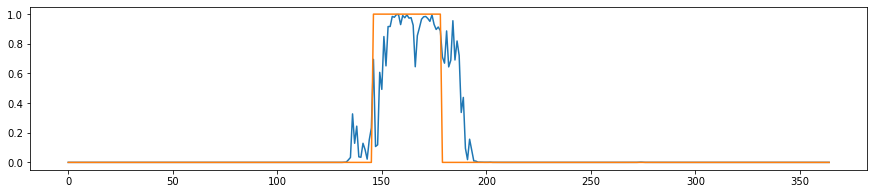

In [221]:
# 예측이 잘된 모델 LBGM에 Test를 한 예측값
plt.figure(figsize=(15,3))
plt.plot(lbgm.predict_proba(x_p)[:,1])
plt.plot(y_p.reset_index(drop=True))
# plt.plot(lbgm.predict(x_p))

# 가상투자에 적용하기 위해 저장용

In [31]:
from lightgbm import LGBMClassifier

y = df_m_window.dropna()['target_t0']
x = df_m_window.dropna().drop(['target_t0','일시'], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


lbgm = LGBMClassifier()
lbgm.fit(x_train, y_train)

# 모델 저장하기
import pickle

with open('lbgm.pickle', 'wb') as f:
    pickle.dump(lbgm, f, pickle.HIGHEST_PROTOCOL)
    

In [39]:
# 저장된 모델 확인하기
with open('lbgm.pickle', 'rb') as f:
    lbgm_a = pickle.load(f)

pred = lbgm_a.predict(x_test)   
prob = lbgm_a.predict_proba(x_test)

print(classification_report(y_test, pred))
print('-'*50)
print('roc_auc : ',roc_auc_score(y_test, prob[:,1]))
print('='*100)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1649
           1       0.89      0.87      0.88       151

    accuracy                           0.98      1800
   macro avg       0.94      0.93      0.93      1800
weighted avg       0.98      0.98      0.98      1800

--------------------------------------------------
roc_auc :  0.9937148341961213


In [50]:
# 데이터 저장하기
df_test.to_csv('df_test_2019.csv')